In [1]:
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import json
import os
from skimage import io, color, transform
%matplotlib inline

In [2]:
final_shape = (250, 200)

In [3]:
images = []
names = []

for file in os.listdir('./pics'):
    raw_image = io.imread(os.path.join(os.getcwd(), 'pics', file))
    smaller = transform.resize(raw_image, final_shape)
    image = color.rgb2gray(smaller)
    images.append([pixel for row in image for pixel in row])
    names.append(file.split('.')[0])

## All the images, plotted as matrix of pixels

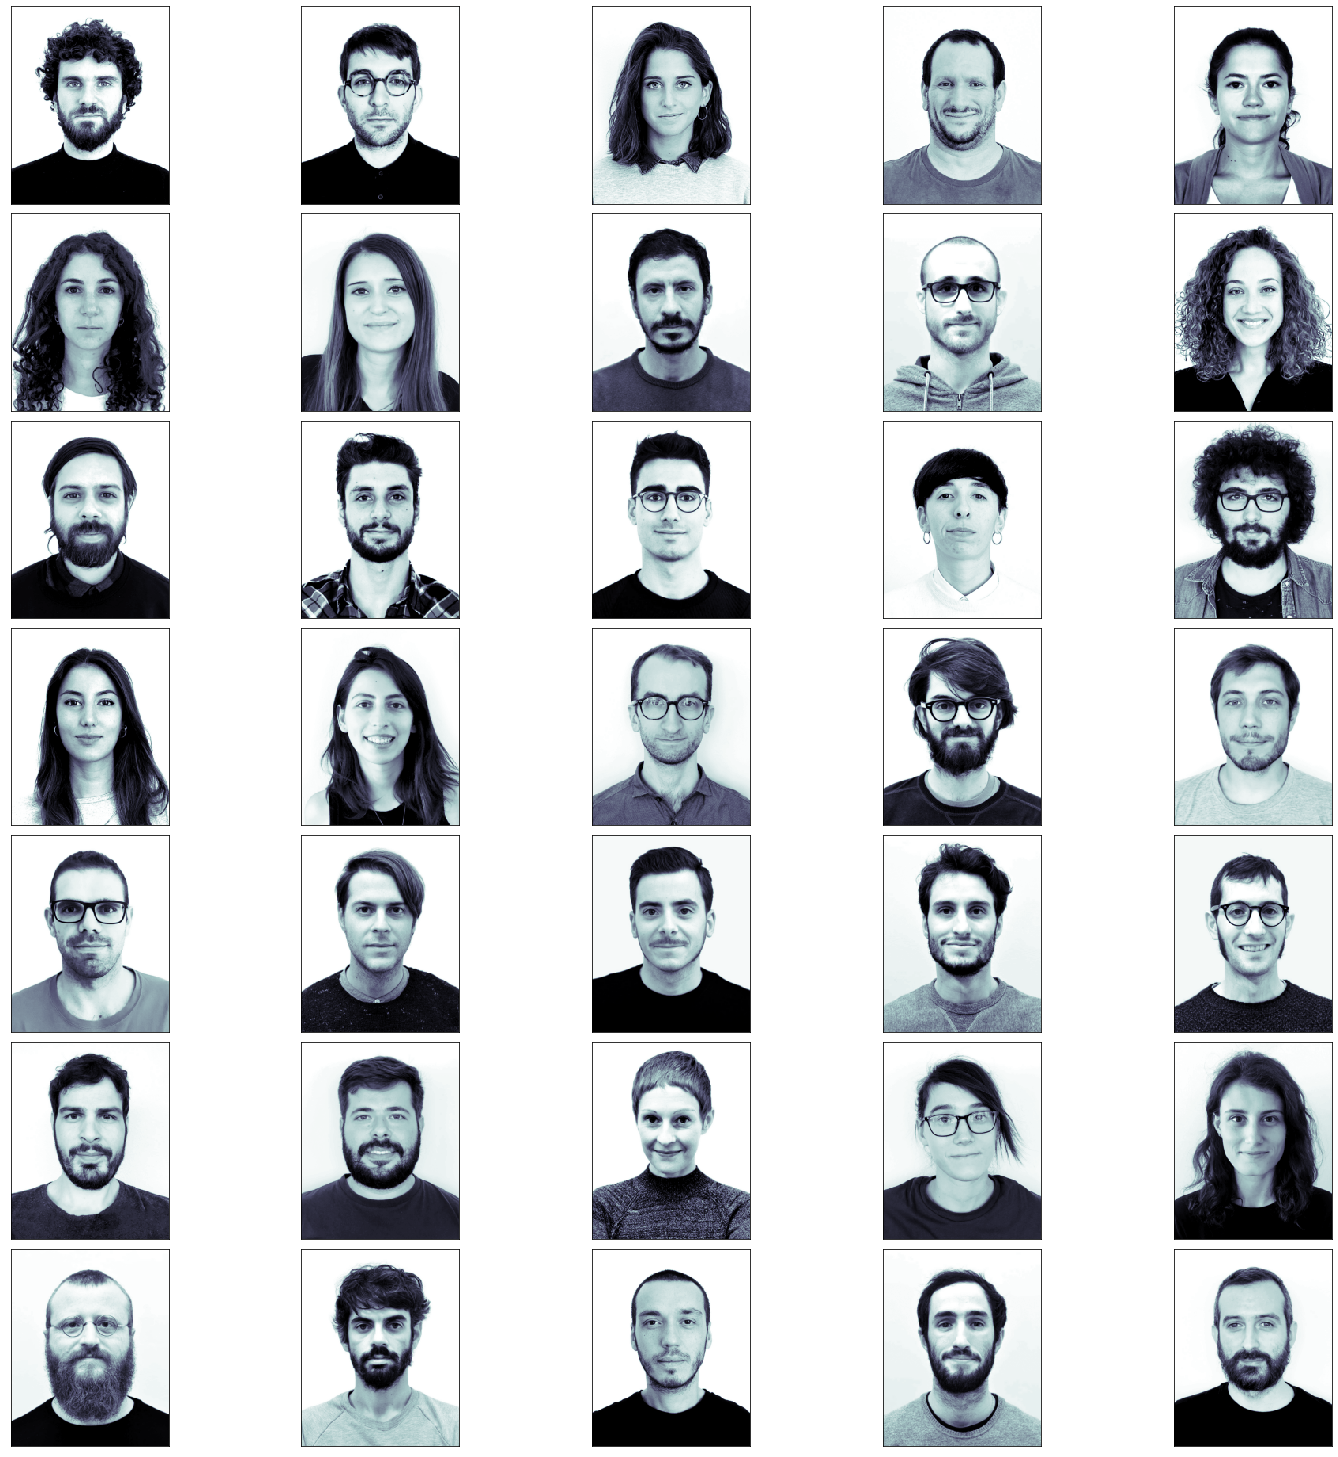

In [7]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(len(images)):
    ax = fig.add_subplot(7, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(images[i], final_shape), cmap=plt.cm.bone, interpolation='nearest')

## PCA

In [8]:
pca = PCA(0.7)
images_proj = pca.fit_transform(images)

In [9]:
people = { name: image.tolist() for name, image in zip(names, images_proj) }

In [10]:
pca.explained_variance_ratio_

array([0.23727147, 0.21758876, 0.15343968, 0.04466513, 0.04204725,
       0.03672081])

In [ ]:
reversed_proj = pca.inverse_transform(images_proj)
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(len(reversed_proj)):
    ax = fig.add_subplot(7, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(reversed_proj[i], final_shape), cmap=plt.cm.bone, interpolation='nearest')

In [ ]:
def get_limited_distance_matrix(pc):
    matrix = []
    for item in images_proj:
        all_distances = []
        for other in images_proj:
            distances = 0
            for i, j, k in list(zip(item, other, pca.explained_variance_ratio_))[0:pc]:
                distances += ((i - j) * 1) ** 2
            all_distances.append(distances ** 0.5)
        matrix.append(all_distances)
    return matrix


dist_matrix = get_limited_distance_matrix(35)

In [ ]:
def plot_dendrogram(model):
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    plt.figure(figsize=(25, 10))
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, labels=[names[i] for i in model.labels_], leaf_font_size=15, leaf_rotation=90)

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity="precomputed", linkage="complete")
model.fit(dist_matrix)
plot_dendrogram(model)

In [ ]:
def get_farthest(distance_matrix, used):
    max_distance = 0
    max_idx = -1
    for idx, item in enumerate(distance_matrix):
        if (idx in used):
            continue
        total_distance = sum(item)
        if (total_distance > max_distance):
            max_distance = total_distance
            max_idx = idx
    return max_idx

def get_cluster(distance_matrix, used):
    points = [point for idx, point in enumerate(distance_matrix) if not idx in used]
    totalone = [sum(i)/len(points) for i in zip(*points)]
    return totalone
    

In [ ]:
iterative_clustering = []
used_idx = []

for iteration in range(1, len(pca.components_)):
    current_distance_matrix = get_limited_distance_matrix(iteration)
    farthest_idx = get_farthest(images_proj, used_idx)
    used_idx.append(farthest_idx)
    cluster = get_cluster(current_distance_matrix, used_idx)
    used = [images_proj[idx].tolist() for idx in used_idx]
    iterative_clustering.append({ "cluster": cluster, "used": used })



In [ ]:
bi_clustering = []

for iteration in range(1, len(pca.components_)):
    current_distance_matrix = get_limited_distance_matrix(iteration)
    model = AgglomerativeClustering(n_clusters=iteration + 1, affinity="precomputed", linkage="complete")
    predictions = model.fit_predict(dist_matrix)
    bi_clustering.append(predictions.tolist())

## Save components and projected

In [ ]:
components = []
for row in pca.components_.tolist():
    new_row = []
    for item in row:
        new_row.append(round(item, 6))
    components.append(new_row)

with open('rotated.json', 'w') as outfile:
    payload = { "people": people, "coeffs": components, "means": pca.mean_.tolist(), "shape": final_shape, "clustering": bi_clustering }
    json.dump(payload, outfile)

In [4]:
images[0]

[0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137254902,
 0.5413643137

In [10]:
raw_image = io.imread(os.path.join(os.getcwd(), 'pics', "edoardo_guido.png"))

In [11]:
raw_image

Array([[[165, 124, 198, 255],
        [165, 124, 198, 255],
        [165, 124, 198, 255],
        ...,
        [165, 124, 198, 255],
        [165, 124, 198, 255],
        [165, 124, 198, 255]],

       [[165, 124, 198, 255],
        [165, 124, 198, 255],
        [165, 124, 198, 255],
        ...,
        [165, 124, 198, 255],
        [165, 124, 198, 255],
        [165, 124, 198, 255]],

       [[165, 124, 198, 255],
        [165, 124, 198, 255],
        [165, 124, 198, 255],
        ...,
        [165, 124, 198, 255],
        [165, 124, 198, 255],
        [165, 124, 198, 255]],

       ...,

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0